# OUTLIER TREATMENT

What is outliers 

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

# Types of outliers

Outliers can also come in different flavours, depending on the environment: POINT OUTLIERS, CONTEXTUAL OUTLIERS and COLLECTIVE OUTLIERS. 

1) Point outliers are single data points that lay far from the rest of the distribution. 

2) Contextual outliers can be noise in data, such as punctuation symbols when realizing text analysis or background noise signal when doing speech recognition. 

3) Collective outliers can be subsets of novelties in data such as a signal that may indicate the discovery of new phenomena.

# What causes Outliers?

Outliers can be classified in two broad categories:

###### 1.Artificial (Error) / Non-natural

###### 2.Natural.

# 1) Artificial Causes

1-a) Data Entry Errors:
    
Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.For example: Annual income of a customer is 100000.Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes $1,000,000 which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.


1-b) Measurement Error: 

It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are 10 weighing machines. 9 of them are correct, 1 is faulty. Weight measured by people on the faulty machine will be higher / lower than the rest of people in the group. The weights measured on faulty machine can lead to outliers.


1-c) Experimental Error:

Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier.
    

1-d) Intentional Outlier: 

This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption.


1-e) Data Processing Error: 

Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.

 





# 2) Natural Causes

Track and field performance of asian athlete with jamaican athlete.

# What is the impact of Outliers on a dataset?

1) Outliers can drastically change the results of modeling.

2) It increases the error variance and reduces the power of model.

3) If the outliers are non-randomly distributed, they can decrease normality

4) They can bias or influence estimates that may be of substantive interest



# What machine learning models are Sensitive to Outliers?

1. Linear Regression-----------------------  Sensitive to Outliers
2. Logistic Regression--------------------   Sensitive to Outliers
3. Decision Tree Regressor or Classifier---- Not Sensitive
4. Ensemble(RF,XGboost,GB)------------------ Not Sensitive
5. KNearest neighbor------------------------ Sensitive 
6. Naivye Bayes Classifier------------------ Not Sensitive 
7. SVM---------------------------------------Not Sensitive
8. Kmeans----------------------------------- Sensitive
9. Hierarichal------------------------------ Sensitive 
10. PCA------------------------------------- Sensitive 
11. Neural Networks------------------------- Sensitive


##### How to detect and  treat outliers

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df1=pd.read_csv("python practise data.csv",na_values=['????','??'],index_col=0)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [52]:
df1.loc[df1["Doors"]=='three',"Doors"]=3
df1["Doors"]=df1["Doors"].replace('four',4)
df1["Doors"].replace("five",5,inplace=True)

In [53]:
df1_num=df1.select_dtypes(exclude="object")
df1_ob=df1.select_dtypes(include="object")

In [54]:
df2_num=df1_num.copy()


def skewness():
    sk=[]
    for i in df2_num:
        sk1= (df2_num[i].mean() - df2_num[i].mode())/df2_num[i].std()
        sk.append(sk1)
    return(sk)
SK=skewness()


SK1=pd.DataFrame(SK)
SK1
SK1.columns=["skewness"]
SK1["skewness"][0]
j=0
for i in df2_num.columns:
    if j<=len(SK1)-1:
        if SK1["skewness"][j]>.5:
            df2_num[i]=df2_num[i].fillna(df2_num[i].median())
        elif SK1["skewness"][j]<-0.5:
            df2_num[i]=df2_num[i].fillna(df2_num[i].median())
        else:
            df2_num[i]=df2_num[i].fillna(df2_num[i].mean())
        j+=1

In [55]:
df2_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   float64
 2   KM         1436 non-null   float64
 3   HP         1436 non-null   float64
 4   MetColor   1436 non-null   float64
 5   Automatic  1436 non-null   int64  
 6   CC         1436 non-null   int64  
 7   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 101.0 KB


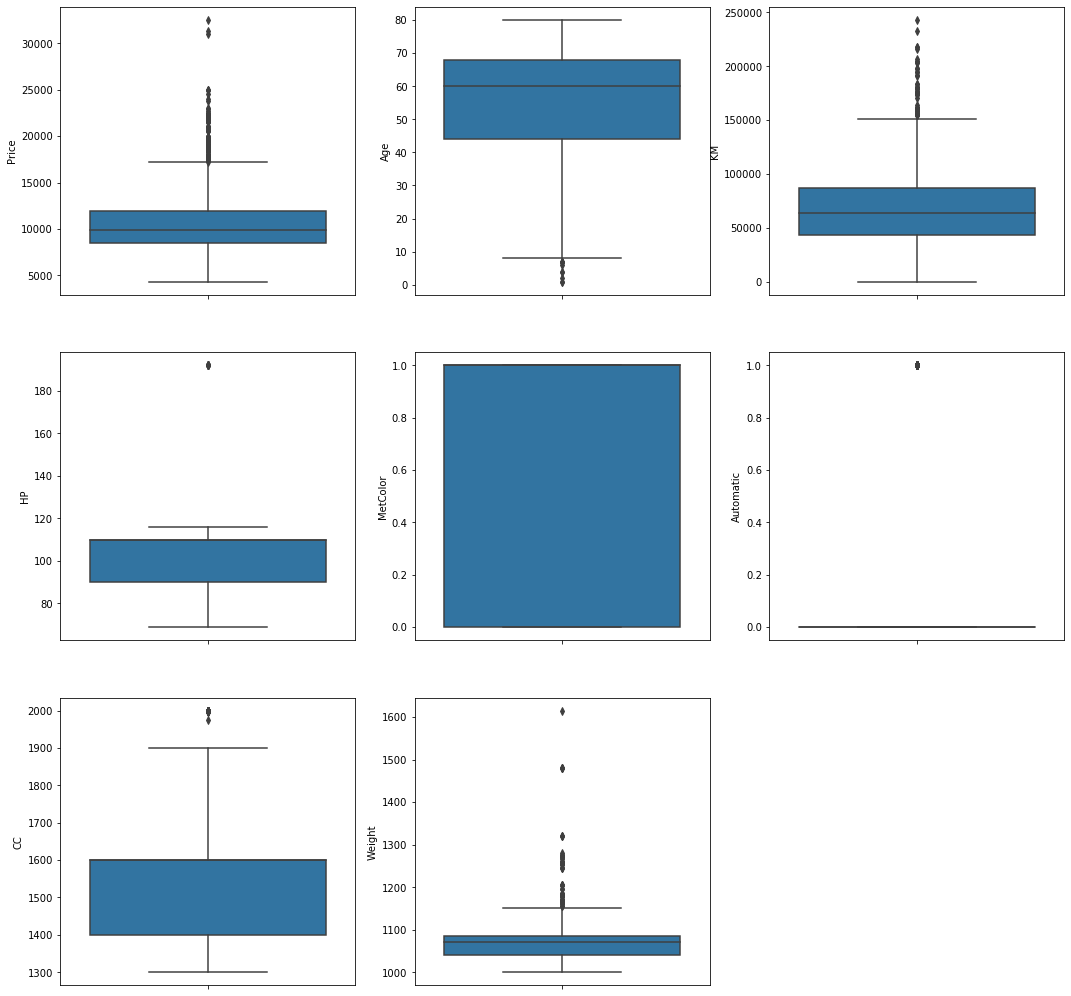

In [57]:
plt.figure(figsize=(18,18))
plotnumber=1
for i in df2_num:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(y=df2_num[i])
    plotnumber+=1
plt.show()


In [58]:
df3_num=df2_num.copy()
q1,q3=df3_num["Weight"].quantile([.25,.75])
q1
q3    
IQR= q3-q1
IQR
lower_out= q1-1.5*IQR
print(lower_out)
upper_out=q3+1.5*IQR
print(upper_out)



972.5
1152.5


In [59]:
df3_num.loc[(df3_num["Weight"])>=upper_out,"Weight"]=upper_out



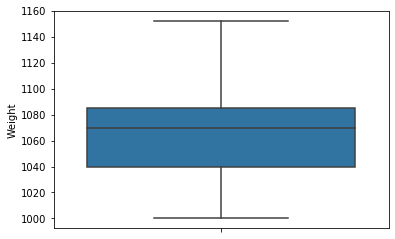

In [60]:
sns.boxplot(y=df3_num["Weight"])

# Treating outliers by Quartile Method

In [61]:
def outliers():
    lw=[]
    ow=[]
    for i in df3_num.columns:
        q1,q3=df3_num[i].quantile([.25,.75])
        lo=q1-1.5*(q3-q1)
        uo=q3+1.5*(q3-q1)
        lw.append(lo)
        ow.append(uo)
    return(lw,ow)
    
    
opw=outliers() 
opw   
opw1=opw[0] 
opw2=opw[1]
opw1
opw2
len(opw1)


j=0 
for i in df3_num:
    if j<=len(opw1)-1:
        df3_num.loc[df3_num[i]<=opw1[j],i]=opw1[j]
        df3_num.loc[df3_num[i]>=opw2[j],i]=opw2[j]
    j+=1

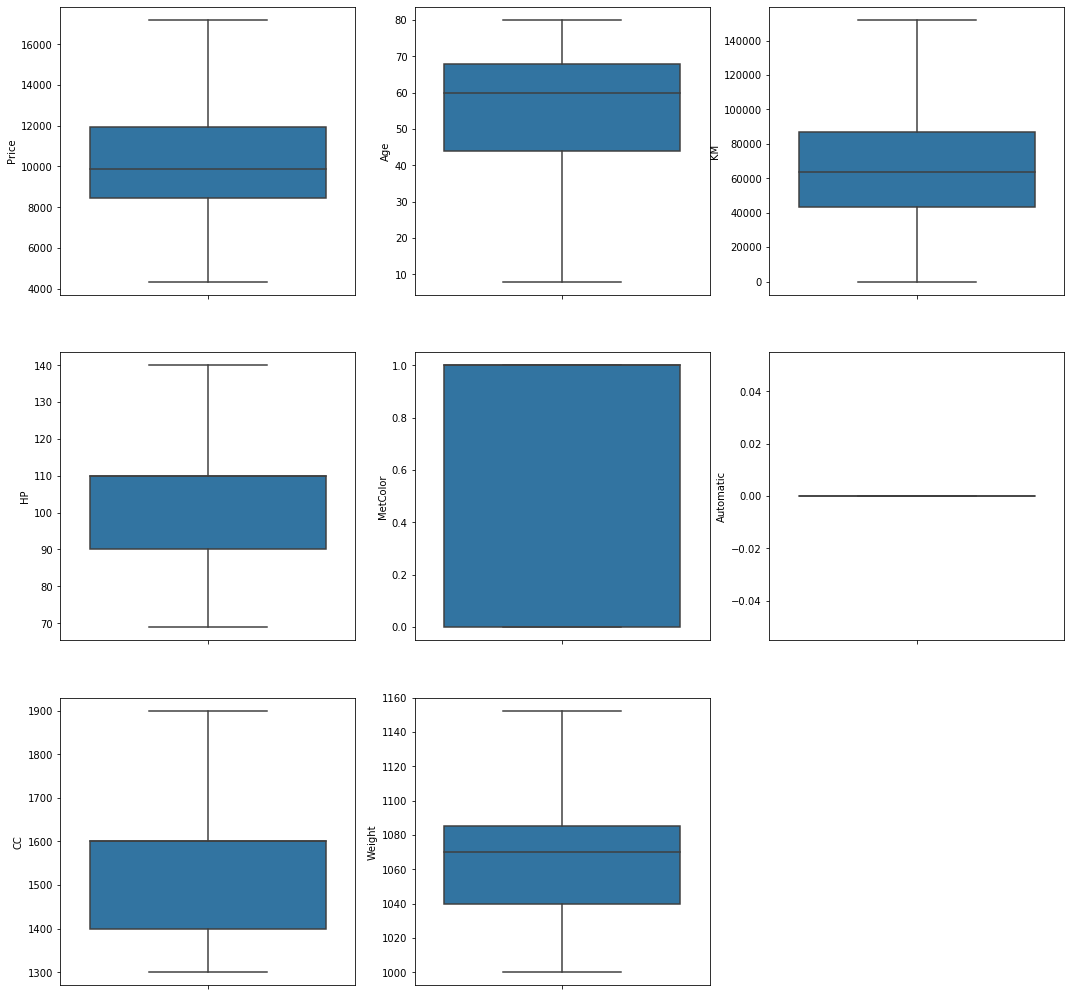

In [62]:
plt.figure(figsize=(18,18))
plotnumber=1
for i in df3_num:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(y=df3_num[i])
    plotnumber+=1
plt.show()

# Treating Outliers by Normal Distribution or 3-sigma method

In [63]:
df4_num=df2_num.drop(["Automatic","MetColor"],axis=1)

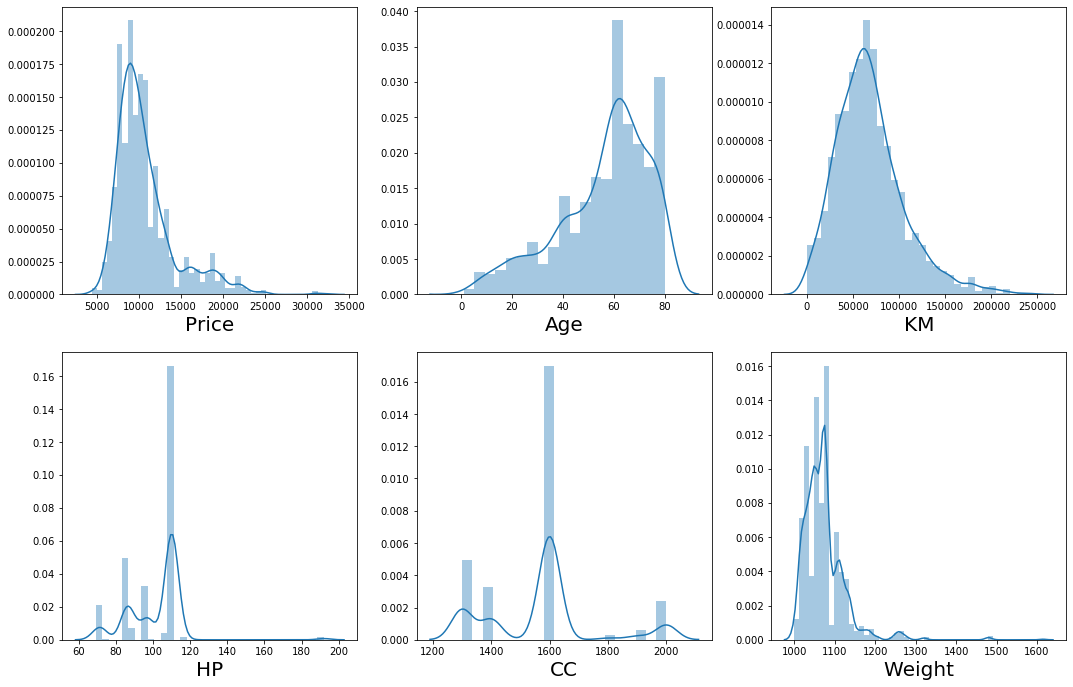

In [64]:
plt.figure(figsize=(18,18))
plotnumber=1
for i in df4_num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df4_num[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()


In [65]:
min_3sigma,max_3sigma=(df4_num["Weight"].mean()-(3*(df4_num["Weight"].std()))),(df4_num["Weight"].mean()+(3*(df4_num["Weight"].std()))) 
min_3sigma,max_3sigma



(914.5362485670604, 1230.3829714886501)

In [68]:
df_out_3sigma=df4_num.loc[(df4_num["Weight"]>min_3sigma) & (df4_num["Weight"]<max_3sigma)]
df_out_3sigma

,Price,Age,KM,HP,CC,Weight
0,13500,23.0,46986.0,90.0,2000,1165
1,13750,23.0,72937.0,90.0,2000,1165
2,13950,24.0,41711.0,90.0,2000,1165
3,14950,26.0,48000.0,90.0,2000,1165
4,13750,30.0,38500.0,90.0,2000,1170
...,...,...,...,...,...,...
1431,7500,60.0,20544.0,86.0,1300,1025
1432,10845,72.0,63634.0,86.0,1300,1015
1433,8500,60.0,17016.0,86.0,1300,1015
1434,7250,70.0,63634.0,86.0,1300,1015


In [69]:
def sigma_outlier():
    min_sigma=[]
    max_sigma=[]
    for i in df4_num:
        min_3sigma,max_3sigma=df4_num[i].mean()-3*df4_num[i].std(),df4_num[i].mean()+3*df4_num[i].std()
        min_sigma.append(min_3sigma)
        max_sigma.append(max_3sigma)
    return (min_sigma,max_sigma)
        



In [77]:
sigma3=sigma_outlier()
sigma3



([-150.06924219589928,
  2.080903664981335,
  -42827.798439618666,
  57.271118810076075,
  1005.2806854414791,
  914.5362485670604],
 [21611.718267265536,
  109.86617154393231,
  180017.54495772452,
  145.75673634312727,
  2128.3753034164592,
  1230.3829714886501])

In [74]:
df5_num=df4_num.copy()

In [75]:
j=0
for i in df4_num:
  if j<=len(sigma3[0])-1:
      df5_num.loc[df5_num[i]<=sigma3[0][j],i]=sigma3[0][j]
      df5_num.loc[df5_num[i]>=sigma3[1][j],i]=sigma3[1][j]
      j+=1

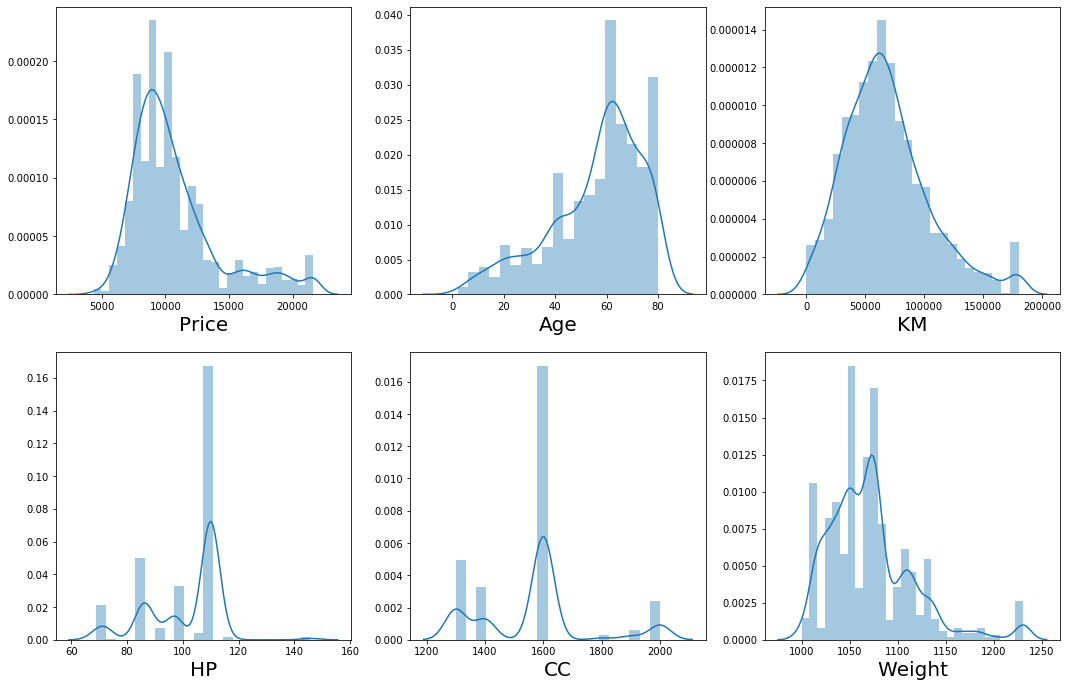

In [76]:
plt.figure(figsize=(18,18))
plotnumber=1
for i in df5_num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df5_num[i])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
plt.show()


# Treating outliers by ISOLATION FOREST

In [79]:
from sklearn.ensemble import IsolationForest

In [80]:
df2_num.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
0,13500,23.0,46986.0,90.0,1.0,0,2000,1165
1,13750,23.0,72937.0,90.0,1.0,0,2000,1165
2,13950,24.0,41711.0,90.0,1.0,0,2000,1165
3,14950,26.0,48000.0,90.0,0.0,0,2000,1165
4,13750,30.0,38500.0,90.0,0.0,0,2000,1170


In [146]:
iso=IsolationForest(contamination=.1,n_estimators=10000)

In [147]:
my_model=iso.fit(df2_num)

In [148]:
df2_num["outlier"]=my_model.predict(df2_num)

In [143]:
final=df2_num.loc[df2_num["outlier"]==1]

In [144]:
final

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight,outlier
0,13500,23.0,46986.0,90.0,1.0,0,2000,1165,1
1,13750,23.0,72937.0,90.0,1.0,0,2000,1165,1
2,13950,24.0,41711.0,90.0,1.0,0,2000,1165,1
3,14950,26.0,48000.0,90.0,0.0,0,2000,1165,1
4,13750,30.0,38500.0,90.0,0.0,0,2000,1170,1
...,...,...,...,...,...,...,...,...,...
1431,7500,60.0,20544.0,86.0,1.0,0,1300,1025,1
1432,10845,72.0,63634.0,86.0,0.0,0,1300,1015,1
1433,8500,60.0,17016.0,86.0,0.0,0,1300,1015,1
1434,7250,70.0,63634.0,86.0,1.0,0,1300,1015,1


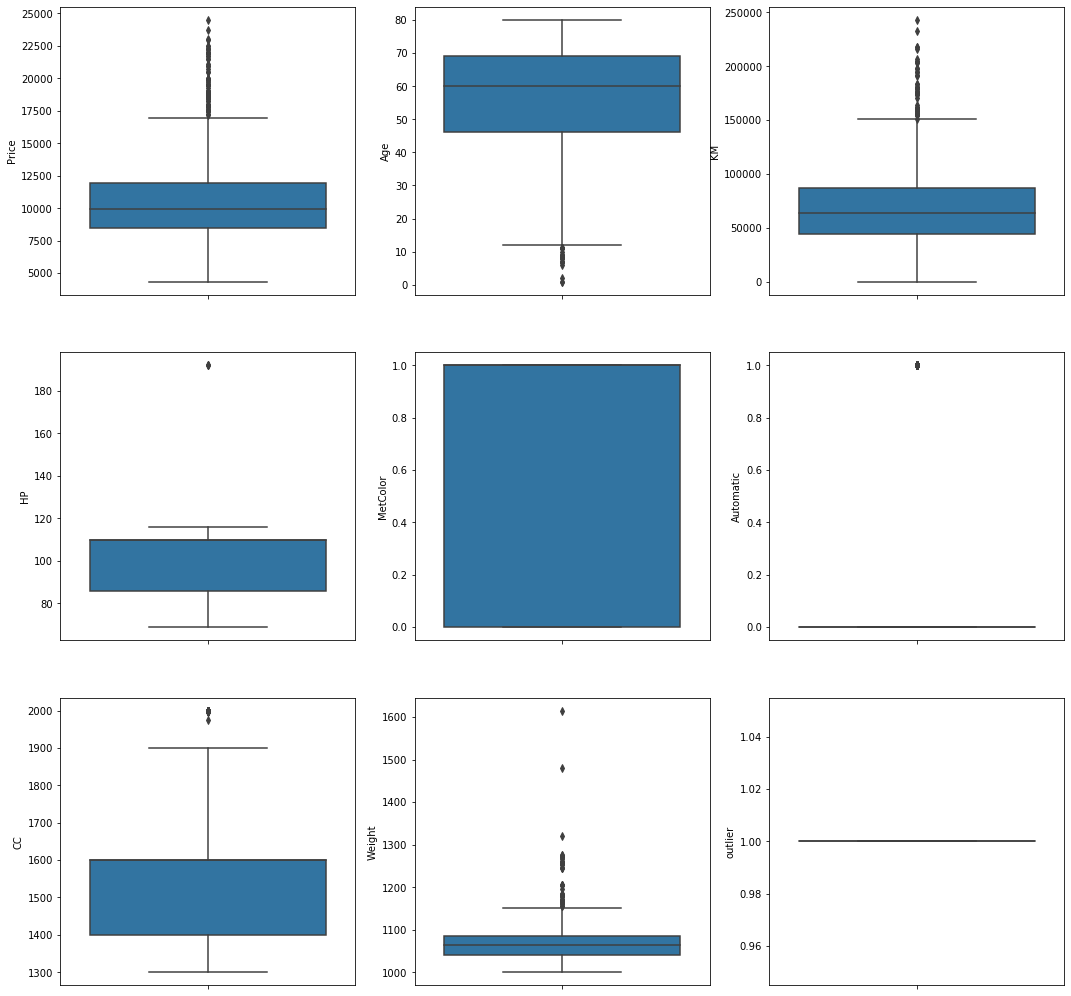

In [145]:
plt.figure(figsize=(18,18))
plotnumber=1
for i in final:
    ax=plt.subplot(3,3,plotnumber)
    sns.boxplot(y=final[i])
    plotnumber+=1
plt.show()